# Stationary Tests 
 ## 1. Augmented Dickey-Fuller Test 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss


In [2]:
df = pd.read_csv('imputedWQ.csv', parse_dates=True, header=0, index_col=0)

In [3]:
# create Series object
Tp = df['Tp']
Cl = df['Cl']
pH = df['pH']
Redox = df['Redox']
Leit = df['Leit']
Cl2 = df['Cl_2']
Fm = df['Fm']
Fm_2 = df['Fm_2']

##### Implementation of Augmented Dickey-Fuller Test, using adfuller function
$ H_0: \gamma = 0,$ the time series is non-stationary, against
$  H_1: \gamma \leq 0,$ the time series is stationary.


In [4]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)


In [5]:
adf_test(Tp)
#p-value is greater than 0.05, and test statistic is greater than 5%critical values, hence the hypothesis can not be rejected
# The Tp timeseries is not stationart- it is deoendent on time


Results of Augmented Dickey-Fuller test:
test statistic              -1.369337
p-value                      0.596885
# of lags                   74.000000
# of observations       139491.000000
Critical Value (1%)         -3.430397
Critical Value (5%)         -2.861561
Critical Value (10%)        -2.566781
dtype: float64


In [6]:
adf_test(Cl)

Results of Augmented Dickey-Fuller test:
test statistic             -34.342080
p-value                      0.000000
# of lags                   74.000000
# of observations       139491.000000
Critical Value (1%)         -3.430397
Critical Value (5%)         -2.861561
Critical Value (10%)        -2.566781
dtype: float64


In [7]:
adf_test(pH)
#Test statistic is under 5% critical values, and the p-values is less then 0.05(it gives us a strong evidence), we reject the null hypothesis
#The timeserie is stationary

Results of Augmented Dickey-Fuller test:
test statistic             -29.634648
p-value                      0.000000
# of lags                   74.000000
# of observations       139491.000000
Critical Value (1%)         -3.430397
Critical Value (5%)         -2.861561
Critical Value (10%)        -2.566781
dtype: float64


In [8]:
adf_test(Redox)

Results of Augmented Dickey-Fuller test:
test statistic             -25.285047
p-value                      0.000000
# of lags                   73.000000
# of observations       139492.000000
Critical Value (1%)         -3.430397
Critical Value (5%)         -2.861561
Critical Value (10%)        -2.566781
dtype: float64


In [9]:
adf_test(Leit)

Results of Augmented Dickey-Fuller test:
test statistic         -1.777003e+01
p-value                 3.310506e-30
# of lags               7.200000e+01
# of observations       1.394930e+05
Critical Value (1%)    -3.430397e+00
Critical Value (5%)    -2.861561e+00
Critical Value (10%)   -2.566781e+00
dtype: float64


In [10]:
adf_test(Cl2)

Results of Augmented Dickey-Fuller test:
test statistic             -24.125646
p-value                      0.000000
# of lags                   71.000000
# of observations       139494.000000
Critical Value (1%)         -3.430397
Critical Value (5%)         -2.861561
Critical Value (10%)        -2.566781
dtype: float64


In [11]:
adf_test(Fm)

Results of Augmented Dickey-Fuller test:
test statistic         -1.038433e+01
p-value                 2.099096e-18
# of lags               7.300000e+01
# of observations       1.394920e+05
Critical Value (1%)    -3.430397e+00
Critical Value (5%)    -2.861561e+00
Critical Value (10%)   -2.566781e+00
dtype: float64


In [12]:
adf_test(Fm_2)

Results of Augmented Dickey-Fuller test:
test statistic         -1.553115e+01
p-value                 2.219626e-28
# of lags               7.400000e+01
# of observations       1.394910e+05
Critical Value (1%)    -3.430397e+00
Critical Value (5%)    -2.861561e+00
Critical Value (10%)   -2.566781e+00
dtype: float64


All timeseries of Water Quality dataset are stationary, except the Temperature. It is dependent on time.

# Testing our Time Series and Stationarize a Time Series
##### monitor the progress of stationarizing our time series
It includes the rolling mean and rolling standard deviation of a time series with a 97 days window, the ACF, PACF, QQ Plot, histogram, and computes the Augmented-Dickey Fuller Test.

In [13]:
import statsmodels.api as smt

In [14]:
def ts_diagnostics(y, lags=None, title='', filename=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = y.rolling( window=1440).mean
    rolling_std = y.rolling( window=1440).std
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    smt.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    smt.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.savefig('./Images/{}.png'.format(filename))
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

## First Order Difference
We assume that we can remove the trend from our data using first order differencing, however, note that differencing and detrending are two separate concepts.

AttributeError: 'function' object has no attribute 'plot'

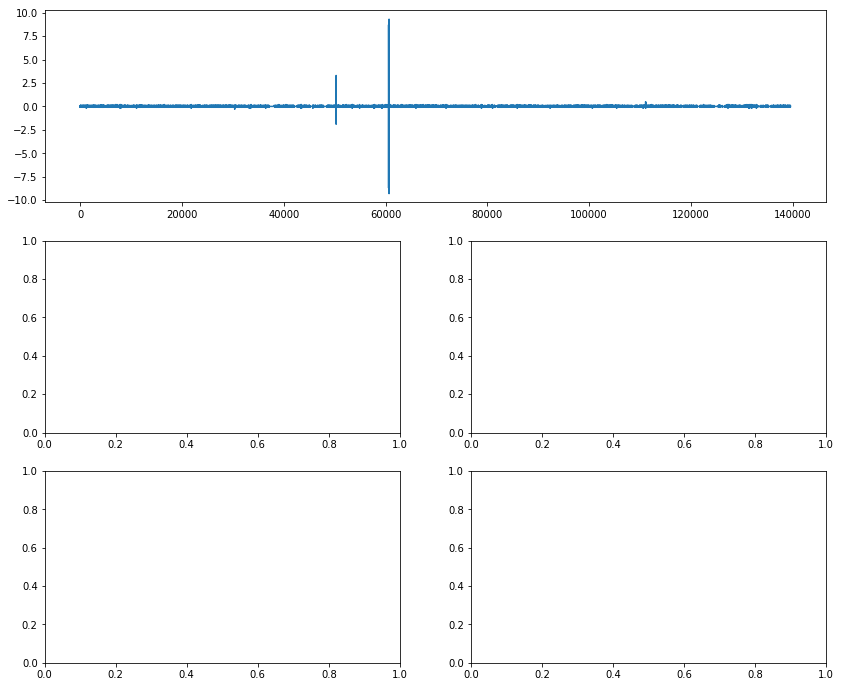

In [33]:
# difference time series
y_diff = np.diff(Tp)
 
# compute time series diagnostics
ts_diagnostics(y_diff, lags=30, title='Differencing Temperature', filename='adf_diff')

In [26]:
y_diff.mean()

2.5794432701608567e-05